# First fastai

In [1]:
from fastai.vision.all import *
path= untar_data(URLs.PETS)/'images'

In [2]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn= cnn_learner(dls, resnet34, metrics=error_rate)

In [23]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [8]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.158540,0.019304,0.006766,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.043298,0.012052,0.003383,00:16


In [9]:
#learn.fit_one_cycle(1)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.8 µs


predict= ('True', tensor(1), tensor([1.4892e-11, 1.0000e+00]))


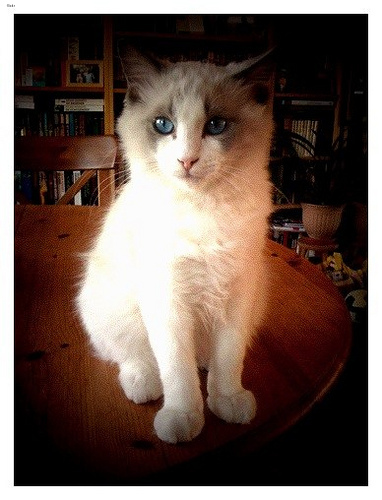

In [24]:
%time
img = dls.dataset[0][0]
print(f'predict= {learn.predict(img)}')
img

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.6 µs


predict= ('False', tensor(0), tensor([9.9999e-01, 5.3280e-06]))


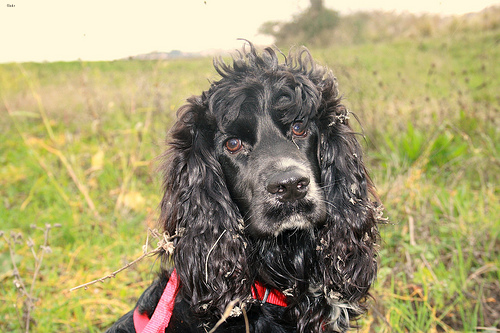

In [25]:
%time
img = dls.dataset[1][0]
print(f'predict= {learn.predict(img)}')
img